In [289]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', 100)

In [290]:
data = pd.read_excel('Excel/marketing_campaign.xlsx')

In [291]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [292]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [293]:
accepted = [n for n in data.columns if 'Accepted' in n] 
accepted

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

In [294]:
data['isAccepted'] = data[accepted].sum(axis=1)

In [295]:
accepted.append('ID')
df = data.drop(columns=accepted)

In [296]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,isAccepted
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0


In [297]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
isAccepted               int64
dtype: object

In [298]:
# Création d'une fonction qui afficher un DataFrame contenant une analyse univariée de nos données 

def univariate(df, col=None): #La fonction prend en entrée un DataFrame
    output = pd.DataFrame(columns = ['Type', 'Count', 'Valeurs Manquantes', 'Nb Valeurs uniques' ,'Mode', 'Moyenne', 'Min', 
    'Q1', 'Median', 'Q3', 'Max', 'Skewness', 'Kurtosis'])
    
    if col == None:
        cols= df.columns
    else:
        cols = [col]


    for element in cols:
        if pd.api.types.is_numeric_dtype(df[element]) :
            type = df[element].dtype
            count = df[element].count()
            v_m = df[element].isnull().sum()
            v_u = df[element].nunique()
            mode = df[element].mode()[0]
            moyenne = round(df[element].mean(),2)
            min = df[element].min()
            q1 = df[element].quantile(0.25)
            median = df[element].median()
            q3 = df[element].quantile(0.75)
            max = df[element].max()
            skewness = round(df[element].skew(),3)
            kurtosis = round(df[element].kurtosis(),3)

            output.loc[element] = [type,count,v_m,v_u,mode,moyenne,min,q1,median,q3,max,skewness,kurtosis]

        else:
            type = df[element].dtype
            count = df[element].count()
            v_m = df[element].isnull().sum()
            v_u = df[element].nunique()
            mode = df[element].mode()[0]
            
            output.loc[element] = [type,count,v_m,v_u,mode,'-','-','-','-','-','-','-','-']

    return output.sort_values(by='Type')        



In [299]:
univariate(df)

,Type,Count,Valeurs Manquantes,Nb Valeurs uniques,Mode,Moyenne,Min,Q1,Median,Q3,Max,Skewness,Kurtosis
Year_Birth,int64,2240,0,59,1976,1968.81,1893,1959.0,1970.0,1977.0,1996,-0.35,0.717
Z_Revenue,int64,2240,0,1,11,11.0,11,11.0,11.0,11.0,11,0,0
Z_CostContact,int64,2240,0,1,3,3.0,3,3.0,3.0,3.0,3,0,0
Complain,int64,2240,0,2,0,0.01,0,0.0,0.0,0.0,1,10.189,101.906
NumWebVisitsMonth,int64,2240,0,16,7,5.32,0,3.0,6.0,7.0,20,0.208,1.822
NumStorePurchases,int64,2240,0,14,3,5.79,0,3.0,5.0,8.0,13,0.702,-0.622
NumCatalogPurchases,int64,2240,0,14,0,2.66,0,0.0,2.0,4.0,28,1.881,8.047
NumWebPurchases,int64,2240,0,15,2,4.08,0,2.0,4.0,6.0,27,1.383,5.703
NumDealsPurchases,int64,2240,0,15,1,2.33,0,1.0,2.0,3.0,15,2.419,8.937
MntGoldProds,int64,2240,0,213,1,44.02,0,9.0,24.0,56.0,362,1.886,3.552


Ce tableau nous fournit plusieurs informations intéressantes.
* Pas de données manquantes si ce n'est la colonne Income. Nous allons traiter ces données.
* Nous avons pour certaines colonnes de grosse dispersion avec des valeurs extrêmes (notamment la colonne Income)
* Des valeurs d'année à vérifier (année minimale de 1893 à supprimer)
* Très peu de données qualitatives mais avec un nb importants de valeurs uniques

In [300]:
# Remplaçons les valeurs nulles de la colonne 'Income' par la médiane.
df = df.fillna(df['Income'].median())

### Commençons par visualiser notre jeu de données

##### I. Données quantitatives

Text(0.5, 1.0, 'Boxplot du Revenu')

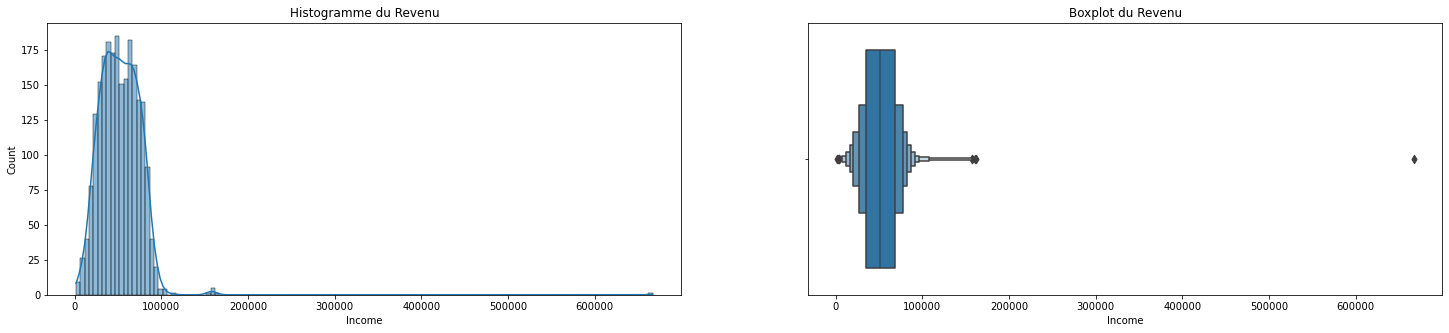

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(25,5));

sns.histplot(ax = axes[0],data = df, x= 'Income', kde=True);
axes[0].set_title('Histogramme du Revenu')

sns.boxenplot(ax = axes[1],data = df, x='Income');
axes[1].set_title('Boxplot du Revenu')

On remarque très rapidemment que nous avons une valeur extrême qui se situe a 666.666 (voir tableau du dessus). Jetons un coup d'oeil à cette valeur.

In [302]:
df[df['Income'] == df['Income'].max()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,isAccepted
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,3,11,0,0


Nous allons éliminer cette valeur de notre jeu de données.

In [303]:
df = df[df['Income'] != df['Income'].max()]

In [304]:
# Pour aller plus vite dans notre analyse, définissons une fonction à partir de celle du haut nous permettant de regarder nos donées plus rapidement.

def numeric_plot_univariate(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(25,5));

    sns.histplot(ax = axes[0],data = df, x= col, kde=True);
    axes[0].set_title(f'Histogramme du {col}')

    sns.boxenplot(ax = axes[1],data = df, x=col);
    axes[1].set_title(f'Boxplot de {col}')

    data = univariate(df,col)
    text = f'------------- {col} -------------\n'
    for col in data.columns:
        text += f"{col} : {data[col][0]}\n"
    
    plt.text(0.91,0.2,text, fontsize=13, transform=plt.gcf().transFigure)


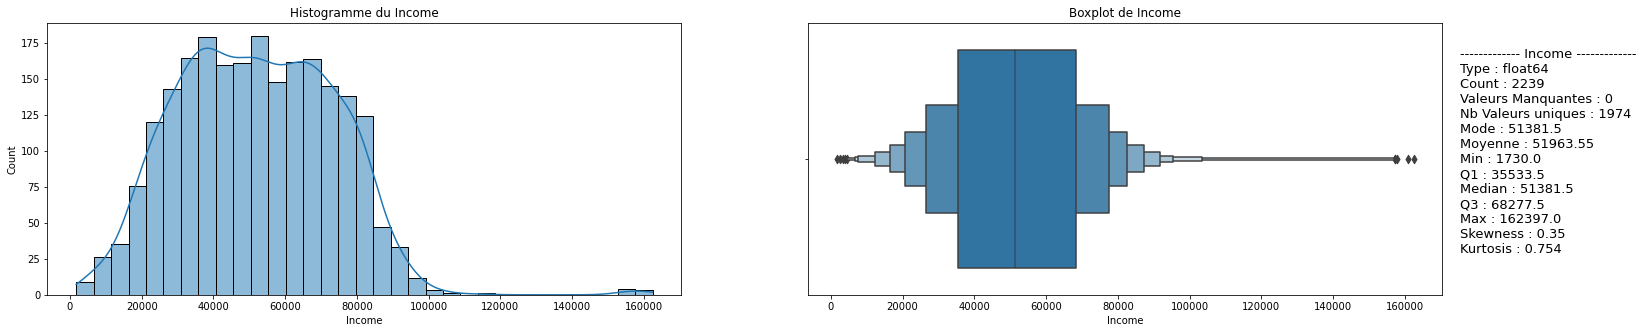

In [305]:
numeric_plot_univariate(df, "Income")

C'est beaucoup mieux ! Regardons via notre fonction univariate définit précèdemment les informations sur notre colonne.

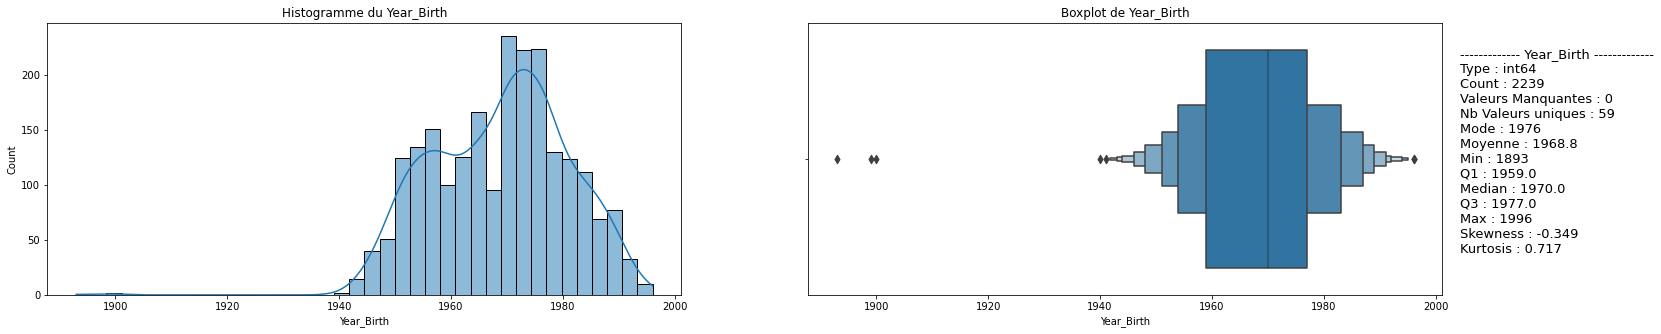

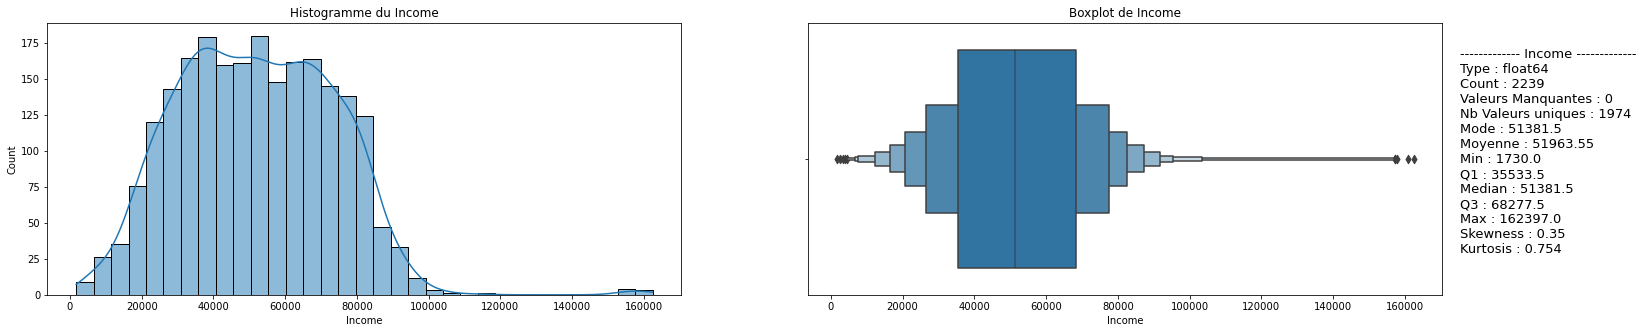

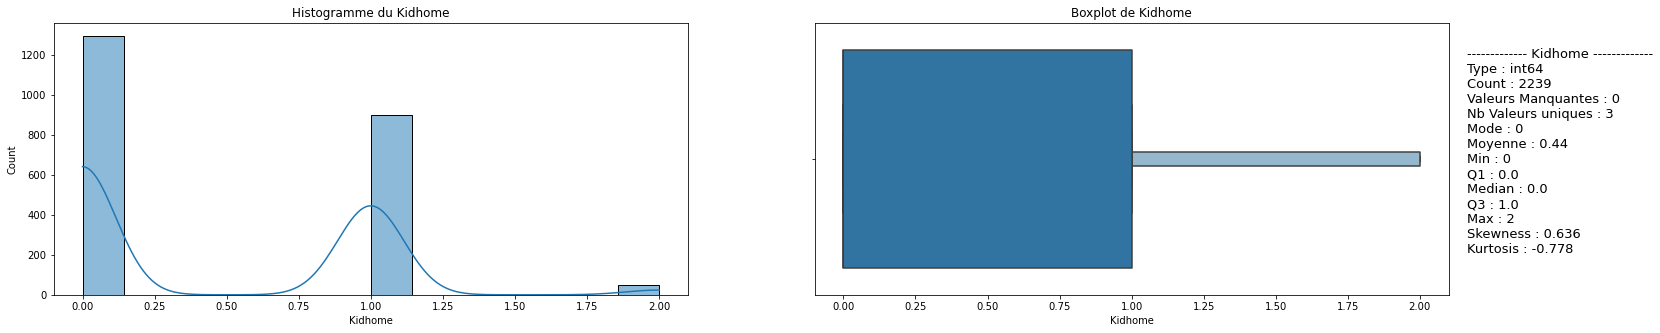

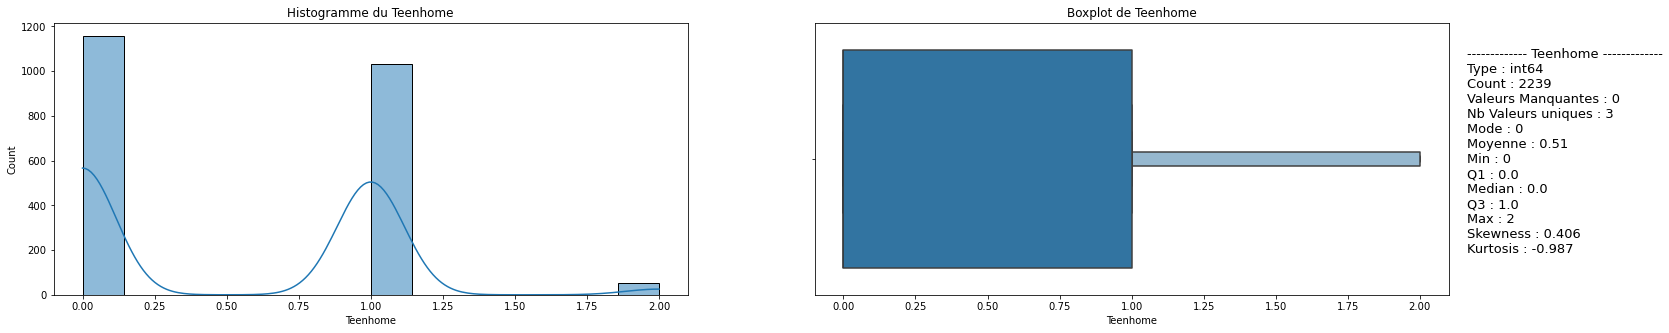

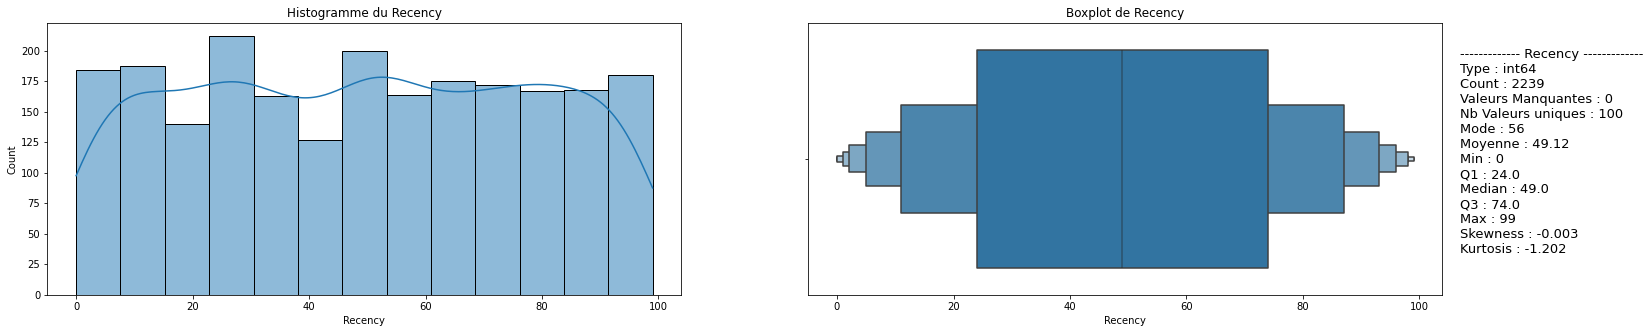

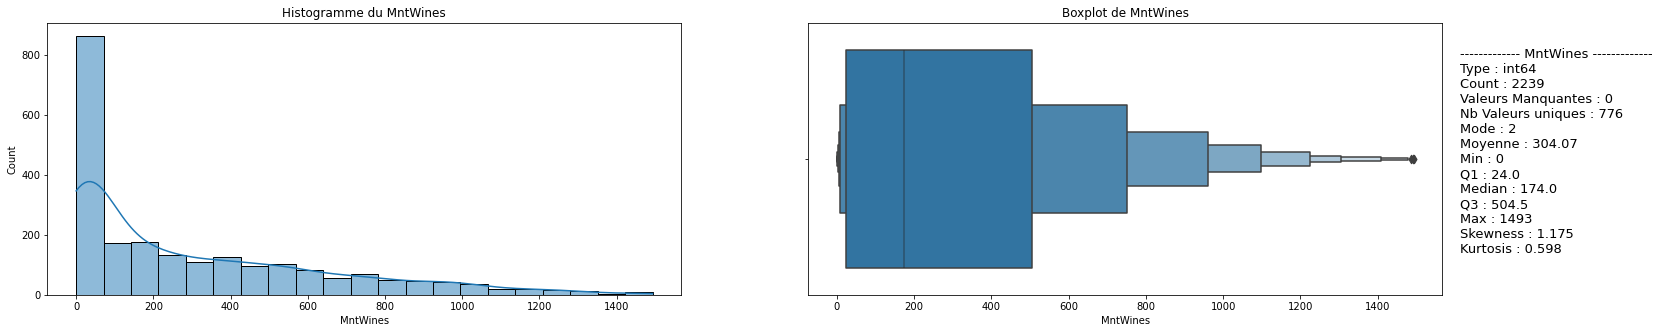

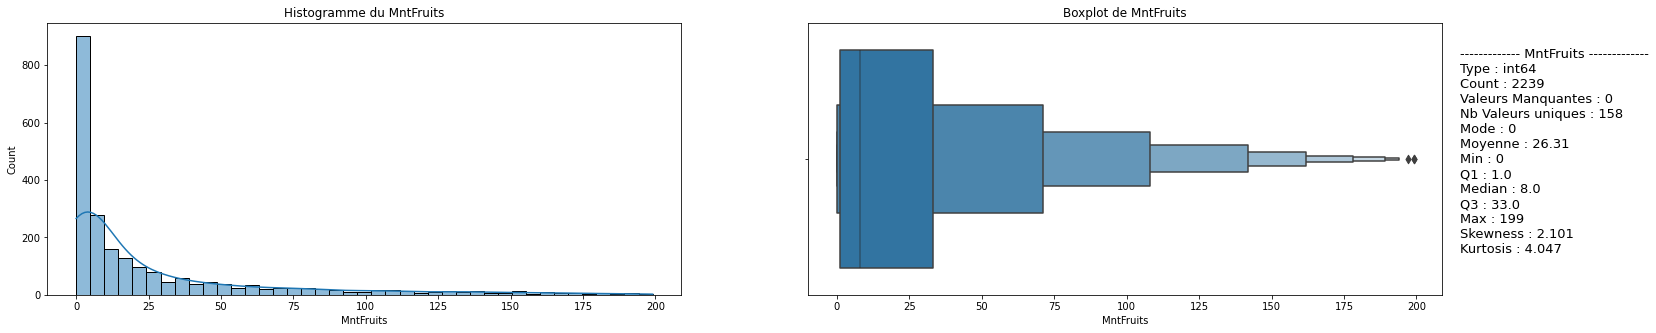

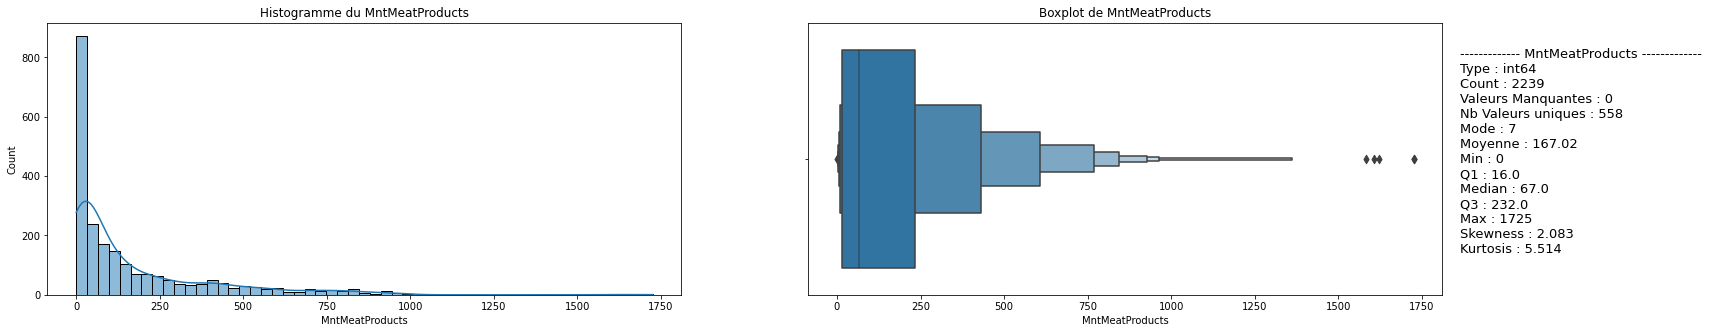

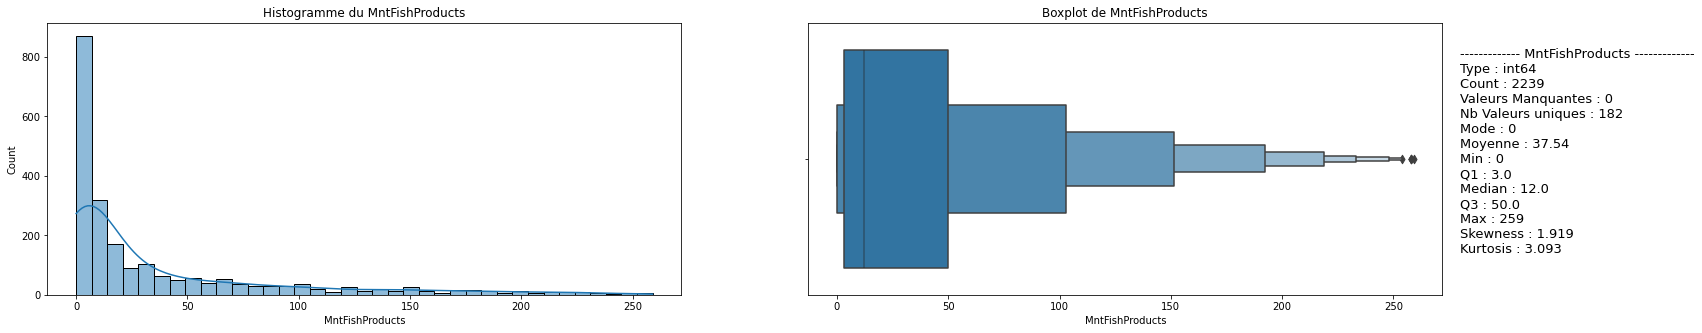

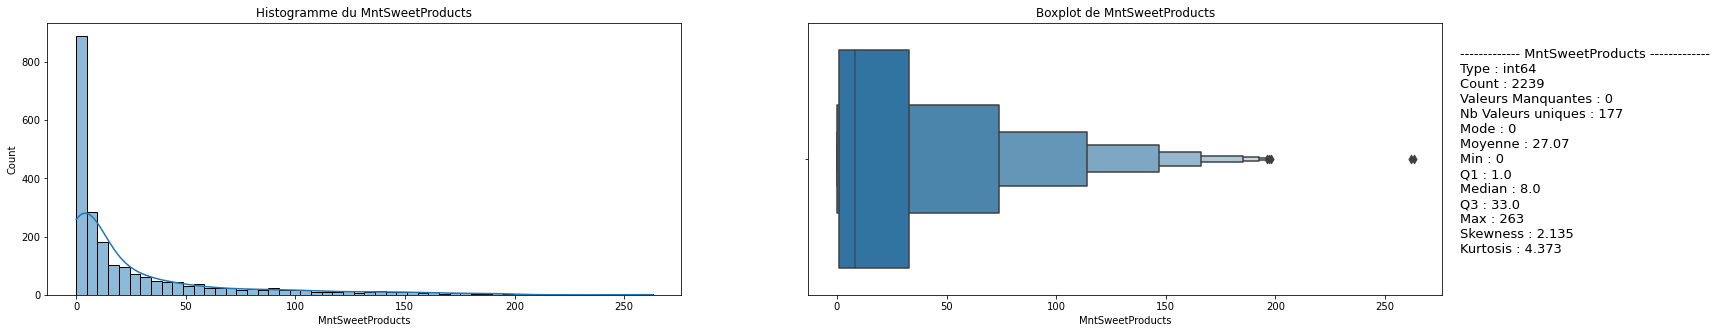

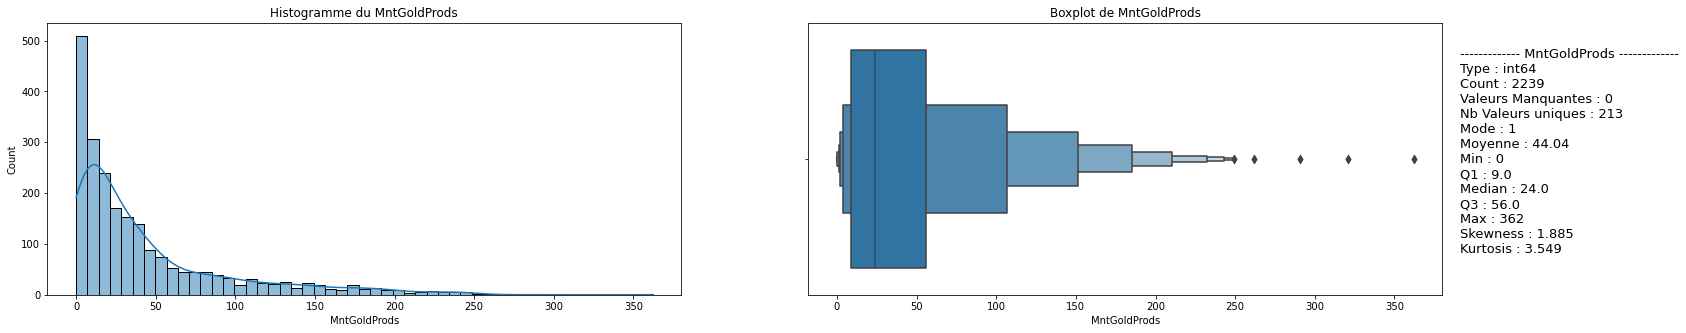

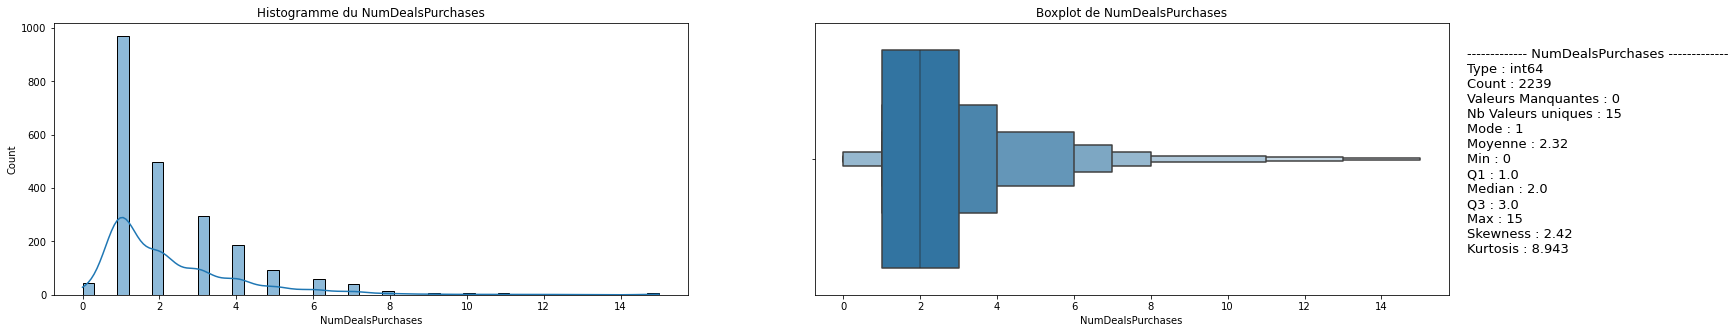

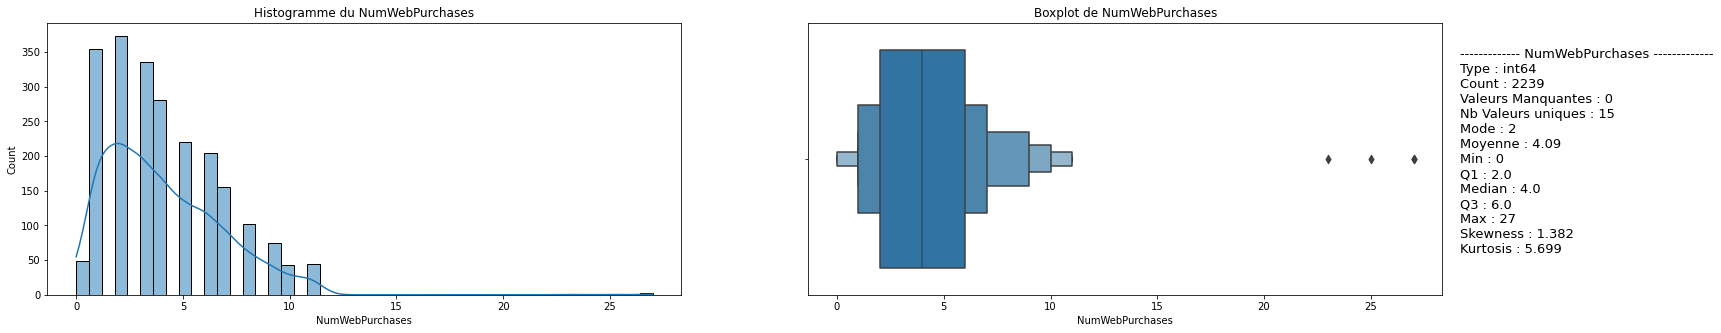

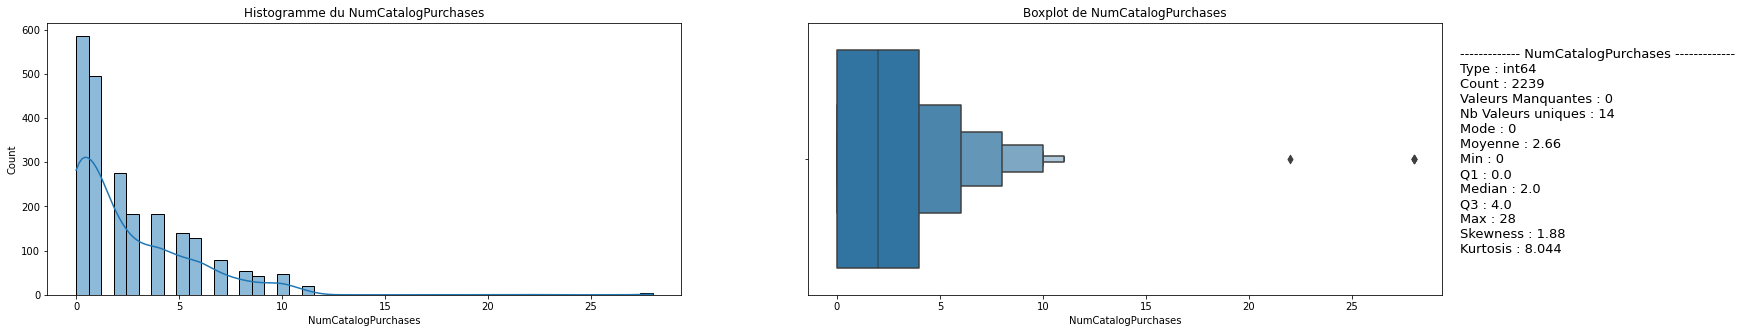

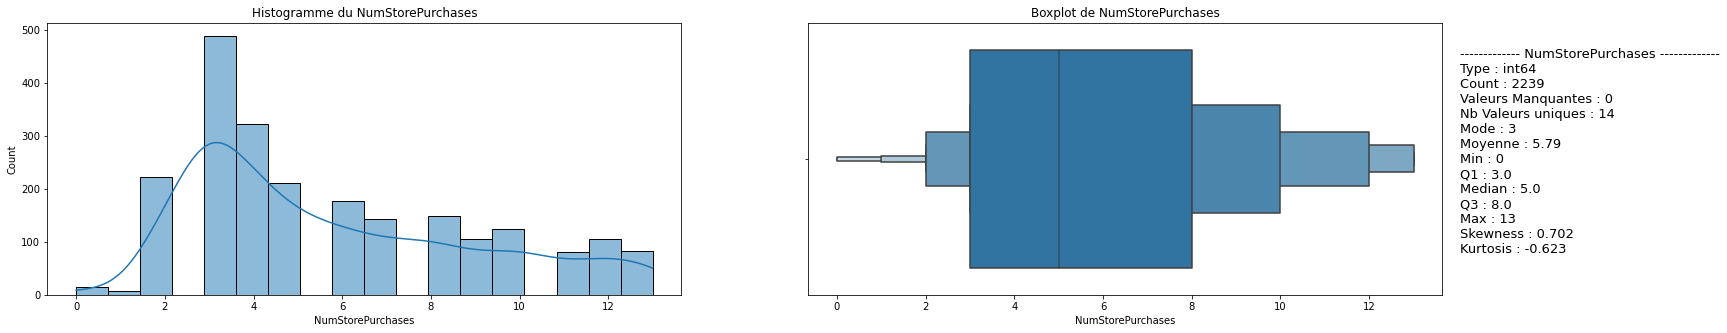

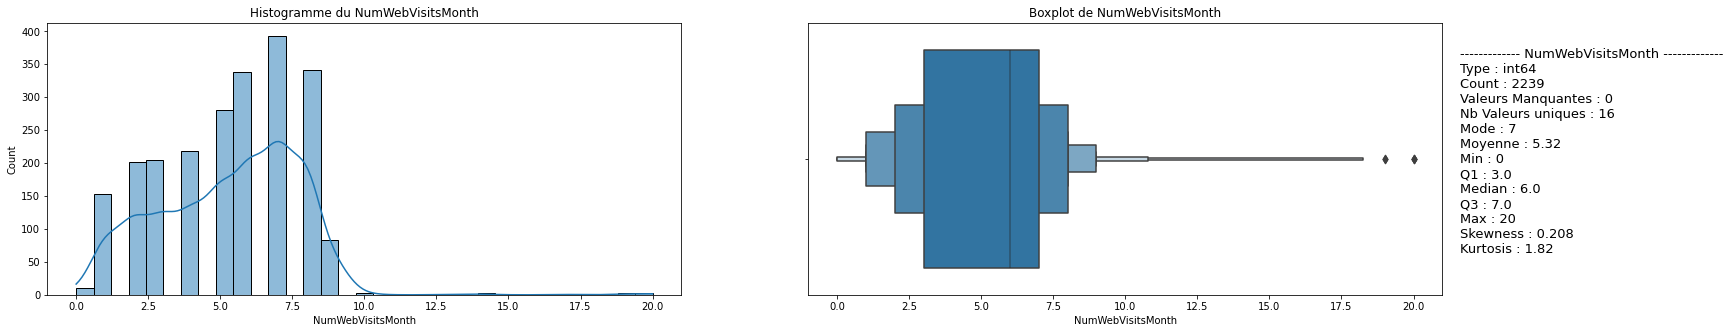

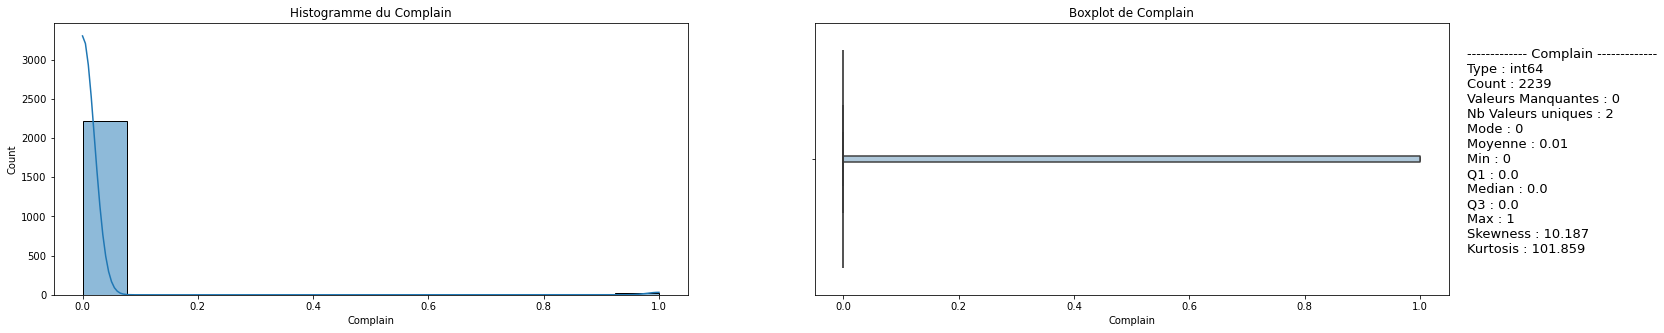

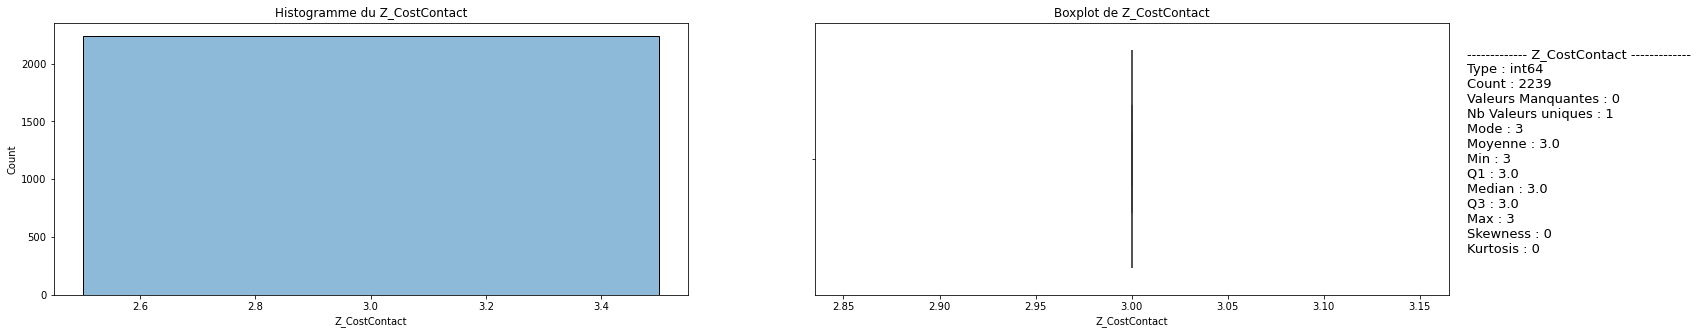

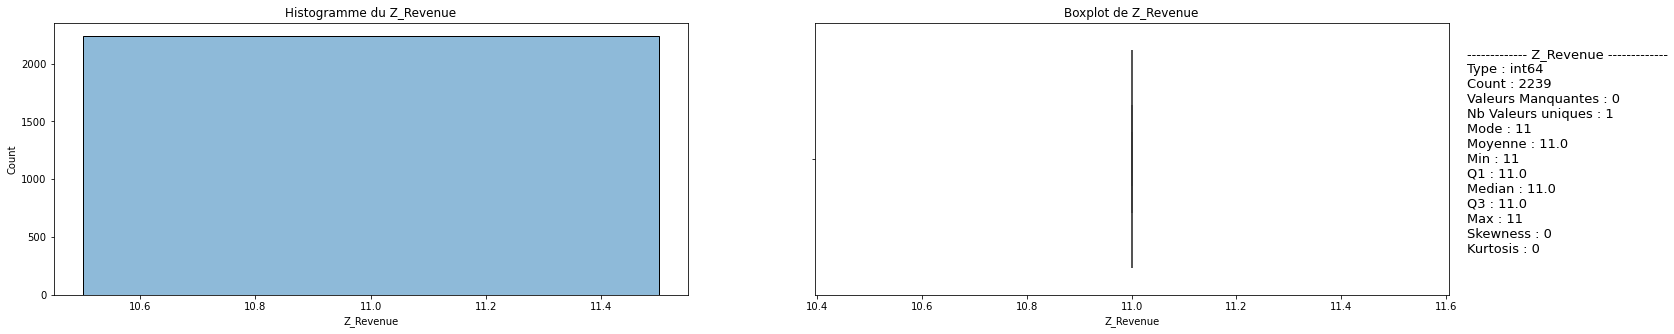

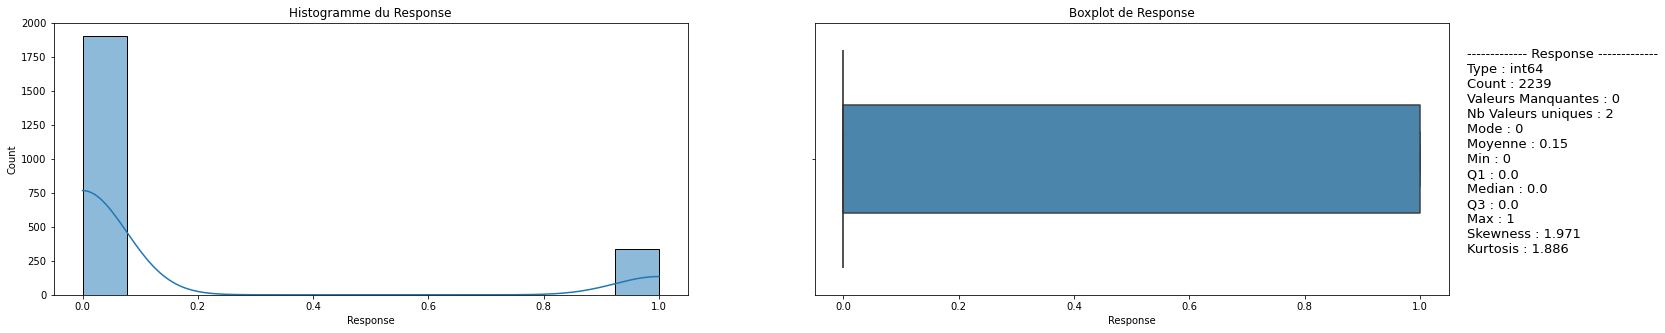

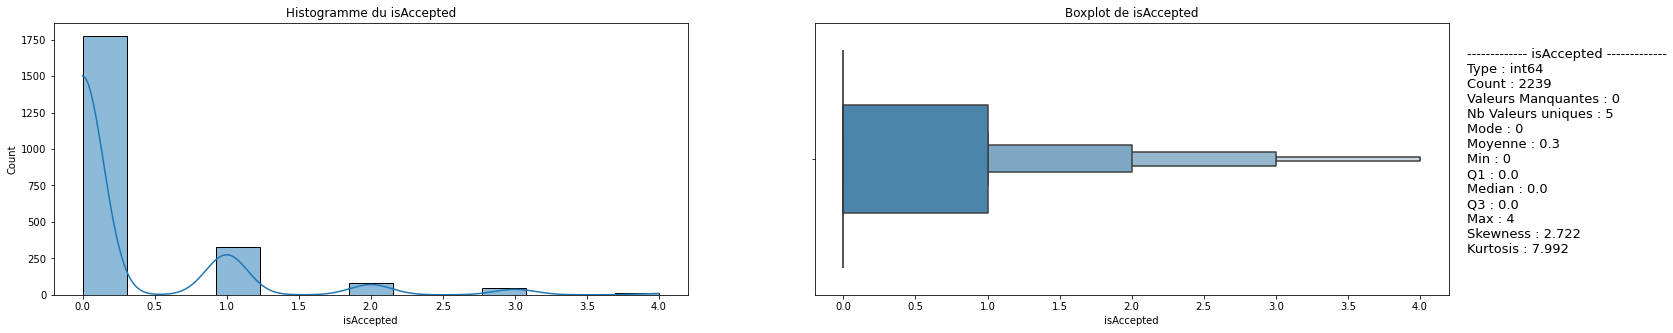

In [306]:
num_col = [col for col in df.select_dtypes(np.number).columns]

for col in num_col:
    numeric_plot_univariate(df,col)

In [307]:
# Suppression des données avec une année inférieur à 1930:

df = df[df['Year_Birth']>1930]

In [308]:
# Définition d'une fonction supprimant automatiquement les données outliers. Nous n'allons pour l'instant pas l'utiliser. 
# A voir dans la suite pour potentiellement améliorer notre model

def removing_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    data = df[(df[col]> Q1-(1.5*IQR)) & (df[col]< Q3+(1.5*IQR))]
    return numeric_plot_univariate(data, col)

### Les données qualitatives 

In [316]:
cat_col = [n for n in df.select_dtypes('object').columns]
cat_col

['Education', 'Marital_Status', 'Dt_Customer']

In [310]:
def value_count_perc(df, col):
    v_c = df[col].value_counts()
    v_c_p = df[col].value_counts(normalize=True).apply(lambda x : round(x*100,2))

    output = pd.concat([v_c, v_c_p], keys=['Count', '%'], axis=1)

    return output


In [311]:
value_count_perc(df, cat_col[0])

,Count,%
Graduation,1126,50.36
PhD,485,21.69
Master,370,16.55
2n Cycle,201,8.99
Basic,54,2.42


In [312]:
value_count_perc(df, cat_col[1])

,Count,%
Married,864,38.64
Together,578,25.85
Single,479,21.42
Divorced,231,10.33
Widow,77,3.44
Alone,3,0.13
Absurd,2,0.09
YOLO,2,0.09


Nous allons nettoyer les données en supprimant les entrées : 'YOLO' et 'Absurd' et en remplaçant 'Alone' par 'Single'

In [313]:
df = df[(df['Marital_Status']!='YOLO') & (df['Marital_Status']!='Absurd')]

In [314]:
df['Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Alone', 'Single')

In [315]:
value_count_perc(df, "Marital_Status")

,Count,%
Married,864,38.71
Together,578,25.90
Single,482,21.59
Divorced,231,10.35
Widow,77,3.45


La colonne Dt_Customer correspond à la date de réponse. Pas utile dans notre objectif d'analyse.

In [318]:
f_df = df
df = df.drop(columns = "Dt_Customer" )

In [319]:
df.select_dtypes("object").columns

Index(['Education', 'Marital_Status'], dtype='object')